In [158]:
import pandas as pd
import numpy as np

In [159]:
user_df = pd.read_csv('cleaned_iser_dataset.csv')
# user_df = user_df.drop(columns=['Unnamed: 0'])
user_df.head(2)

,Name,Occupation,Country,Company,Position,Type,CRI
0,0064692b7bc52326414c8f9c2bfe0445,"PostDoc @Western and @UQuebec, Ph.D. @Charité,...",Canada,"Charité,deepkapha.ai,Public Library of Science...","Postdoctoral Researcher,Scientist,Technical Re...","Research,Other,Student","Master Edu,Master Exp"
1,00b11a3e2e7ad34edddea58da8c29836,Animatrice d'ateliers pédagogiques et de bien ...,France,Université de Paris · Internship,Research Project,Research,Master Exp


In [160]:
skill_df = pd.read_csv('processed_data\skill_cleaned_with_emsi_dataset.csv')
skill_df = skill_df.drop(columns=['Unnamed: 0'])
skill_df.head(2)

,Name,Skills,Skill_English,Skill_cleaned,subcategoryName,categoryName
0,0064692b7bc52326414c8f9c2bfe0445,"{'Programming', 'Computational Modeling', 'Neu...","['Literature Reviews', 'Computational Modeling...","['Electrophysiology', 'Computer Programming', ...","['Statistical Software', 'Molecular, Cellular,...","['Science and Research', 'Health Care', 'Analy..."
1,00b11a3e2e7ad34edddea58da8c29836,"{'Microsoft Outlook', 'Basecamp', 'Fundraising...","['Salesforce.com Administration', 'Google Suit...","['Salesforce Development', 'Social Media Marke...","['Fundraising and Crowdsourcing', 'Social Medi...","['Business', 'Science and Research', 'Hospital..."


In [161]:
df = pd.merge(user_df, skill_df, on='Name')
df.head(2)

,Name,Occupation,Country,Company,Position,Type,CRI,Skills,Skill_English,Skill_cleaned,subcategoryName,categoryName
0,0064692b7bc52326414c8f9c2bfe0445,"PostDoc @Western and @UQuebec, Ph.D. @Charité,...",Canada,"Charité,deepkapha.ai,Public Library of Science...","Postdoctoral Researcher,Scientist,Technical Re...","Research,Other,Student","Master Edu,Master Exp","{'Programming', 'Computational Modeling', 'Neu...","['Literature Reviews', 'Computational Modeling...","['Electrophysiology', 'Computer Programming', ...","['Statistical Software', 'Molecular, Cellular,...","['Science and Research', 'Health Care', 'Analy..."
1,00b11a3e2e7ad34edddea58da8c29836,Animatrice d'ateliers pédagogiques et de bien ...,France,Université de Paris · Internship,Research Project,Research,Master Exp,"{'Microsoft Outlook', 'Basecamp', 'Fundraising...","['Salesforce.com Administration', 'Google Suit...","['Salesforce Development', 'Social Media Marke...","['Fundraising and Crowdsourcing', 'Social Medi...","['Business', 'Science and Research', 'Hospital..."


In [162]:
df.shape

(374, 12)

In [191]:
heirarachy_level='Skill_cleaned' # 'subcategoryName','categoryName','Skill_cleaned'

In [192]:
df.loc[0,heirarachy_level]

"['Electrophysiology', 'Computer Programming', 'Artificial Intelligence', 'SPSS Modeler', 'Data Analysis', 'Deep Learning', 'Python (Programming Language)', 'Mathematical Modeling', 'Experimental Psychology', 'Artificial Neural Networks', 'Neuroscience', 'Animal Science', 'Machine Learning', 'Computational Modeling', 'Cognitive Neuroscience', 'Microsoft Office', 'Statistics', 'LaTeX', 'Administrative Skills', 'Research', 'Literature Reviews', 'Experimental Design', 'MATLAB', 'Scientific Writing', 'Physical Science', 'Neurons']"

In [193]:
eval(df.loc[0,heirarachy_level])

['Electrophysiology',
 'Computer Programming',
 'Artificial Intelligence',
 'SPSS Modeler',
 'Data Analysis',
 'Deep Learning',
 'Python (Programming Language)',
 'Mathematical Modeling',
 'Experimental Psychology',
 'Artificial Neural Networks',
 'Neuroscience',
 'Animal Science',
 'Machine Learning',
 'Computational Modeling',
 'Cognitive Neuroscience',
 'Microsoft Office',
 'Statistics',
 'LaTeX',
 'Administrative Skills',
 'Research',
 'Literature Reviews',
 'Experimental Design',
 'MATLAB',
 'Scientific Writing',
 'Physical Science',
 'Neurons']

In [194]:
skills = []
for i in range(df.shape[0]):
    skills.extend(list(eval(df.loc[i,heirarachy_level])))
skills = set(skills)

In [195]:
len(skills)

1220

In [196]:
skills = list(skills)
skills

['Laboratory Procedures',
 'X-Rays',
 'Lab Notebooks',
 'JQuery',
 'Microsoft Windows',
 'Project Implementation',
 'Clinical Data Management',
 'Cognitive Neuroscience',
 'Twitter Feed',
 'Biotechnology',
 'Elgg',
 'Rapid Learning',
 'Ilasm',
 'Experimental Psychology',
 'PHP 7',
 'Arch Linux',
 'Column Chromatography',
 'Drug Discovery',
 'React.js',
 'Internal Communications',
 'Mandarin Chinese',
 'Software Development Methodologies',
 'Conjoint Analysis',
 'Technical Writing',
 'Communications Management',
 'Medical Simulation',
 'Moodle',
 'Controlled Experiments',
 'Learning Development',
 'Adult Education',
 'Morphometrics',
 'Apache Zeppelin',
 'Search Engine Optimization',
 'IDA Pro',
 'TensorFlow',
 'Capital Markets',
 'Prezi (Presentation Software)',
 'Business Marketing',
 'Mathematical Analysis',
 'Cisco Networking',
 'Interdisciplinary Teaching',
 'Ligand',
 'Opendata',
 'Bloomberg Terminal',
 'Molecular Biology',
 'Atlassian OpsGenie',
 'Elasticsearch',
 'Developmental 

In [224]:
co_matrix = np.zeros((len(skills),len(skills)))

In [225]:
for i in range(df.shape[0]):
    skill_i = list(eval(df.loc[i,heirarachy_level]))
    # print(skill_i)
    for j in range(len(skill_i)):
        index_j = skills.index(skill_i[j])
        # print(skill_i[j])
        # print(index_j)
        for k in range(1,len(skill_i)-j):
            index_k = skills.index(skill_i[j+k])
            co_matrix[index_j,index_k]+=1
            co_matrix[index_k,index_j]+=1
        

In [226]:
co_matrix

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 0.],
       [1., 1., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [227]:
np.shape(co_matrix)

(1220, 1220)

In [228]:
len(skills)

1220

In [229]:
connection_of_nodes = np.sum(co_matrix,axis=0)
to_delete=[]
to_delete_skill = []
for i in range(len(skills)):
    if connection_of_nodes[i]==0:
        to_delete.append(i)
        to_delete_skill.append(skills[i])
co_matrix = np.delete(co_matrix,to_delete,axis=0)
co_matrix = np.delete(co_matrix,to_delete,axis=1)
skills = [ele for ele in skills if ele not in to_delete_skill]

In [230]:
len(skills)

1219

In [231]:
np.shape(co_matrix)

(1219, 1219)

In [232]:
nodes_df = pd.DataFrame(skills,columns=['label'])
nodes_df['id'] = list(range(1,len(skills)+1))

In [233]:
nodes_df.to_csv('results/'+heirarachy_level+'nodes_df.csv',sep=';',index=None)

In [234]:
source=[]
target=[]
weight=[]
for i in range(len(skills)):
    for j in range(i):
        if co_matrix[i,j]!=0:
            source.append(i)
            target.append(j)
            weight.append(co_matrix[i,j])


In [235]:
edge_df=pd.DataFrame.from_dict({'source':source,'target':target,'weight':weight})
edge_df

,source,target,weight
0,13,7,1.0
1,14,3,1.0
2,14,4,1.0
3,14,10,1.0
4,16,9,1.0
...,...,...,...
32188,1218,953,1.0
32189,1218,1070,1.0
32190,1218,1076,1.0
32191,1218,1107,1.0


In [244]:
edge_df[edge_df['weight']==82]

,source,target,weight
10605,648,568,82.0


In [245]:
skills[648]

'Research'

In [246]:
skills[568]

'Microsoft Office'

<AxesSubplot: >

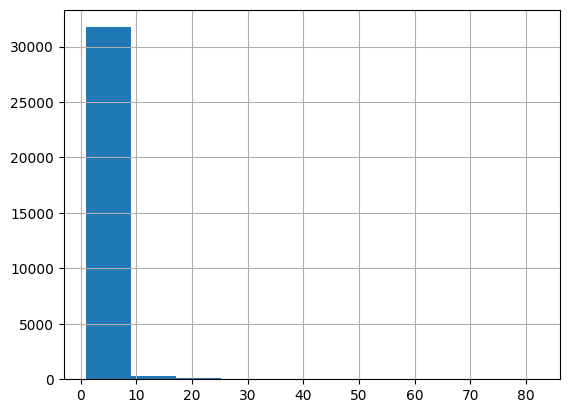

In [236]:
edge_df['weight'].hist(bins=10)

In [237]:
edge_df[['weight']].describe()

,weight
count,32193.000000
mean,1.625384
std,2.701429
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,82.000000


In [238]:
edge_df.to_csv('results/emsi_'+heirarachy_level+'_edge_df.csv',sep=';',index=None)